#bin I3---tech, nontech, other

SIC---wikipedia page

**need to calculate ratios

--if you use a column to calcuate a variable--you need to exclude it for your analysis---leakers
--do not use original T values when calculating ratios--ratio will help reduce skewness

-spearman only for continuous features
-categorical and continuous should be treated differently


In [32]:
# imports
import pandas as pd
import numpy as np

In [33]:
# Need to do some calculation for Y, S,T (use ratios for prime)
# purple group they in text --> not as useful --> not all of them are ID like features some of them might be useful 
    # 1 tend to be very useful 

In [34]:
# CHECK HIGH AND LOW !!! --> INVALID VALUES
# TRULY MISSING VALUES??? CHECK
# are HIGH LOW CONNECTED TO NULL VALUES 
# WHAT DOES - mean --> when does it happen 
# high and low of the IPO
# Pmid fair estimation of P(H) or P(L) --> UNDERPRICING DETECTING (Y1, Y2)

In [35]:
data = pd.read_excel('Competition1_raw_data.xlsx')
                    #dtype={'P(IPO)': float, 'P(1Day)': float})
# define dashes as missing --> 0 or NaN
data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null object
P(H)       682 non-null object
P(L)       682 non-null object
P(1Day)    682 non-null object
C1         682 non-null object
C2         682 non-null object
C3         682 non-null object
C4         682 non-null object
C5         682 non-null object
C6         682 non-null object
C7         682 non-null object
T1         682 non-null object
T2         682 non-null object
T3         682 non-null object
T4         682 non-null object
T5         682 non-null object
S1         682 non-null object
S2         682 non-null object
S3         682 non-null object
dtypes: object(22)
memory usage: 117.3+ KB


In [37]:
# Companies that have dashes in some places 
data[(data['P(1Day)']=='-') & (data['P(IPO)']=='-') & (data['P(H)']=='-')& (data['C1']=='-')& (data['C2']=='-')& 
     (data['C3']=='-')& (data['C4']=='-')& (data['C5']=='-')& (data['C6']=='-')& (data['C7']=='-')& (data['I3']=='-')]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,-,-,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,-,-,-,-,538,12732,11126,301,631,94,172,116
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,-,-,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,290,8454,7137,192,384,45,68,139
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,494,12004,10226,277,560,46,100,91


In [38]:
# I3
data.loc[data['I3'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,-,-,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,-,-,-,-,538,12732,11126,301,631,94,172,116
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,-,48854155,7000000,-,631,19479,17409,451,976,71,252,155
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,-,-,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,290,8454,7137,192,384,45,68,139
490,RCH,"CHINA CGAME, INC.",-,3.5,-,-,-,-,-,-,-,50737000,737000,-,322,9820,8893,230,410,61,92,91
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,494,12004,10226,277,560,46,100,91
614,TZOO,TRAVELZOO INC,-,3.5,-,-,-,-,-,-,-,-,-,-,146,3600,3189,88,181,5,26,38


In [39]:
# P(IPO)
data.loc[data['P(IPO)'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,-,-,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,-,-,-,-,538,12732,11126,301,631,94,172,116
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,-,-,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,290,8454,7137,192,384,45,68,139
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,494,12004,10226,277,560,46,100,91


In [40]:
# P(H)
data.loc[data['P(H)'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,-,-,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,-,-,-,-,538,12732,11126,301,631,94,172,116
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,-,9602340,9602340,-,521,12812,11190,285,545,72,60,121
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,-,48854155,7000000,-,631,19479,17409,451,976,71,252,155
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,-,-,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,290,8454,7137,192,384,45,68,139
490,RCH,"CHINA CGAME, INC.",-,3.5,-,-,-,-,-,-,-,50737000,737000,-,322,9820,8893,230,410,61,92,91
560,STRL,STERLING CONSTRUCTION CO INC,1600,15,-,-,-,-,-,-,-,10186881,2021758,-,310,7195,6393,172,325,44,65,85
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,494,12004,10226,277,560,46,100,91
614,TZOO,TRAVELZOO INC,-,3.5,-,-,-,-,-,-,-,-,-,-,146,3600,3189,88,181,5,26,38


In [41]:
# P(L)
data.loc[data['P(L)'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,-,-,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,-,-,-,-,538,12732,11126,301,631,94,172,116
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,-,9602340,9602340,-,521,12812,11190,285,545,72,60,121
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,-,48854155,7000000,-,631,19479,17409,451,976,71,252,155
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,-,-,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,290,8454,7137,192,384,45,68,139
490,RCH,"CHINA CGAME, INC.",-,3.5,-,-,-,-,-,-,-,50737000,737000,-,322,9820,8893,230,410,61,92,91
560,STRL,STERLING CONSTRUCTION CO INC,1600,15,-,-,-,-,-,-,-,10186881,2021758,-,310,7195,6393,172,325,44,65,85
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,-,-,-,-,494,12004,10226,277,560,46,100,91
614,TZOO,TRAVELZOO INC,-,3.5,-,-,-,-,-,-,-,-,-,-,146,3600,3189,88,181,5,26,38


In [11]:
# P(1Day)
data.loc[data['P(1Day)'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621,4.5,6.5,5.5,-,-,-,-,...,5000000,-,351,10352,9296,235,482,52,124,120
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640,3,5,4,-,-,-,59.261,...,3350000,59.261,406,12065,11056,282,667,72,169,182
203,ELMD,"Electromed, Inc.",3845,4,6,4,-,-,-,12.999,...,1700000,12.999,224,6146,5551,154,386,29,52,140
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,...,9602340,-,521,12812,11190,285,545,72,60,121
217,EURX,EURAND N.V.,2834,16,19,17,-,-,-,109.336,...,7000000,109.336,-,-,-,-,-,-,-,-
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,...,7000000,-,631,19479,17409,451,976,71,252,155
286,HPJ,"Highpower International, Inc.",3690,3.25,4,3,-,-,-,73.262,...,525000,73.262,377,10731,9703,240,486,45,104,96
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123


In [12]:
# C1
data.loc[data['C1'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621,4.5,6.5,5.5,-,-,-,-,...,5000000,-,351,10352,9296,235,482,52,124,120
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640,3,5,4,-,-,-,59.261,...,3350000,59.261,406,12065,11056,282,667,72,169,182
203,ELMD,"Electromed, Inc.",3845,4,6,4,-,-,-,12.999,...,1700000,12.999,224,6146,5551,154,386,29,52,140
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,...,9602340,-,521,12812,11190,285,545,72,60,121
217,EURX,EURAND N.V.,2834,16,19,17,-,-,-,109.336,...,7000000,109.336,-,-,-,-,-,-,-,-
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,...,7000000,-,631,19479,17409,451,976,71,252,155
286,HPJ,"Highpower International, Inc.",3690,3.25,4,3,-,-,-,73.262,...,525000,73.262,377,10731,9703,240,486,45,104,96
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123


In [13]:
# C2
data.loc[data['C2'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621,4.5,6.5,5.5,-,-,-,-,...,5000000,-,351,10352,9296,235,482,52,124,120
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640,3,5,4,-,-,-,59.261,...,3350000,59.261,406,12065,11056,282,667,72,169,182
203,ELMD,"Electromed, Inc.",3845,4,6,4,-,-,-,12.999,...,1700000,12.999,224,6146,5551,154,386,29,52,140
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,...,9602340,-,521,12812,11190,285,545,72,60,121
217,EURX,EURAND N.V.,2834,16,19,17,-,-,-,109.336,...,7000000,109.336,-,-,-,-,-,-,-,-
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,...,7000000,-,631,19479,17409,451,976,71,252,155
286,HPJ,"Highpower International, Inc.",3690,3.25,4,3,-,-,-,73.262,...,525000,73.262,377,10731,9703,240,486,45,104,96
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123


In [14]:
# C3
data.loc[data['C3'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
43,ARP,"ARC DOCUMENT SOLUTIONS, INC.",7334,13,16,14,13.75,112,1,-,...,13350000,-,507,12468,11248,289,701,79,140,142
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
113,CDM,"China Century Dragon Media, Inc.",7311,5.25,7,6,5.3,270,0,-,...,1200000,-,347,10344,9413,242,492,73,97,136
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621,4.5,6.5,5.5,-,-,-,-,...,5000000,-,351,10352,9296,235,482,52,124,120
170,DG,DOLLAR GENERAL CORP,5331,21,23,21,22.73,85,1,-,...,34100000,9495.25,808,21623,19603,498,1310,194,232,326
172,DIVX,DIVX INC,7371,16,14,12,18.7,140,1,-,...,9100000,33.047,439,11526,10498,267,715,46,93,126
177,DMD,LEAF GROUP LTD.,7379,17,16,14,45.0372,173,1,-,...,8900000,-,797,22667,20515,549,1200,95,165,291
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,...,9602340,-,521,12812,11190,285,545,72,60,121
243,FTD,"FTD Group, Inc.",7389,13,14,12,13.6,78,1,-,...,15407693,397.06,486,16280,13922,350,674,48,73,112


In [15]:
# C4
data.loc[data['C4'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621,4.5,6.5,5.5,-,-,-,-,...,5000000,-,351,10352,9296,235,482,52,124,120
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640,3,5,4,-,-,-,59.261,...,3350000,59.261,406,12065,11056,282,667,72,169,182
203,ELMD,"Electromed, Inc.",3845,4,6,4,-,-,-,12.999,...,1700000,12.999,224,6146,5551,154,386,29,52,140
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,...,9602340,-,521,12812,11190,285,545,72,60,121
217,EURX,EURAND N.V.,2834,16,19,17,-,-,-,109.336,...,7000000,109.336,-,-,-,-,-,-,-,-
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,...,7000000,-,631,19479,17409,451,976,71,252,155
286,HPJ,"Highpower International, Inc.",3690,3.25,4,3,-,-,-,73.262,...,525000,73.262,377,10731,9703,240,486,45,104,96
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123


In [16]:
# C5
data.loc[data['C5'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,...,-,-,290,8454,7137,192,384,45,68,139
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,...,-,-,494,12004,10226,277,560,46,100,91
614,TZOO,TRAVELZOO INC,-,3.5,-,-,-,-,-,-,...,-,-,146,3600,3189,88,181,5,26,38


In [17]:
# C6
data.loc[data['C6'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,...,-,-,290,8454,7137,192,384,45,68,139
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,...,-,-,494,12004,10226,277,560,46,100,91
614,TZOO,TRAVELZOO INC,-,3.5,-,-,-,-,-,-,...,-,-,146,3600,3189,88,181,5,26,38


In [18]:
# C7
data.loc[data['C7'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
20,ALIM,ALIMERA SCIENCES INC,2834,11,17,15,11,174,1,-1.43,...,6550000,-,473,13801,12500,296,768,66,136,182
43,ARP,"ARC DOCUMENT SOLUTIONS, INC.",7334,13,16,14,13.75,112,1,-,...,13350000,-,507,12468,11248,289,701,79,140,142
45,ARTE,ARTES MEDICAL INC,2834,6,14,12,7.67,222,1,-1.42,...,4600000,-,280,8296,7337,178,514,37,77,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,VTUS,"ASSEMBLY BIOSCIENCES, INC.",2834,6,7,6,31.5,150,0,-,...,2900000,-,235,7412,6551,156,353,33,77,67
655,WDAY,"Workday, Inc.",7372,28,26,24,48.69,43,1,-,...,22750000,-,461,13520,12211,315,722,57,70,129
671,XTNT,XTENT INC,3841,16,18,16,16.48,178,1,-1.6,...,4700000,-,275,6542,6008,146,357,41,67,111
672,XTXI,"ENLINK MIDSTREAM, INC.",1311,19.5,18.5,16.5,8.46667,75,0,-,...,2306000,-,554,13739,12268,325,843,65,139,174


In [19]:
# T1 --> T5
data.loc[data['T1'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
217,EURX,EURAND N.V.,2834,16,19,17,-,-,-,109.336,...,7000000,109.336,-,-,-,-,-,-,-,-


In [20]:
# S1 --> S3
data.loc[data['S3'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
217,EURX,EURAND N.V.,2834,16,19,17,-,-,-,109.336,...,7000000,109.336,-,-,-,-,-,-,-,-


In [21]:
# T5 --> -1 
data.loc[data['T5'] == -1] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122


In [22]:
# S1 --> -1 
data.loc[data['S1'] == -1] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12,12,10,17.98,133,1,0.14,...,18000000,32.179,419,10764,9856,259,643,-1,97,134


In [23]:
# C3 --> -1 
data.loc[data['C3'] == -1] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
47,ASPV,Aspreva Pharmaceuticals CORP,2834,11,15,13,14.79,39,1,-1,...,7200000,-,223,5079,4700,104,292,29,60,76


In [24]:
# P(H) --> 0 
data.loc[data['P(H)'] == 0] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
332,KIPS,"Kips Bay Medical, Inc.",3841,8,0,8,7.93,309,0,-0.7,...,2062500,0.223,341,9314,8647,218,519,55,119,102


In [25]:
# P(1Day) --> 0 
data.loc[data['P(1Day)'] == 0] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147
266,GSAT,"Globalstar, Inc.",4899,17,18,16,0,108,1,0.23,...,7500000,127.147,759,18196,16262,397,959,85,228,173
279,HERO,"HERCULES OFFSHORE, INC.",1381,20,20,18,0,111,1,-,...,9200000,-,494,12518,11207,297,603,49,103,135
364,MATH,SAJAN INC,3674,6,8,6,0,85,0,-0.95,...,4000000,130,235,5674,5085,132,284,27,66,63


In [26]:
# C2 --> 0 
data.loc[data['C2'] == 0] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
32,ANGO,ANGIODYNAMICS INC,3841,11,14,12,12.5,83,0,0.13,...,1950000,38.434,329,7154,6296,175,384,47,47,94
57,AVRX,AVALON PHARMACEUTICALS INC,2834,10.5,12,10,9.49,149,0,-1.63,...,2750000,1.9,270,6360,5780,146,356,63,38,72
72,BDAY,"CELEBRATE EXPRESS, INC",5961,15.5,15,13,16.7,96,0,-0.34,...,3200000,37.811,298,7231,6423,196,270,30,48,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,WSSI,"VISUAL SCIENCES, INC.",7372,8.5,9,8,9.04,124,0,-0.86,...,5000000,16.36,263,6650,6002,165,390,32,66,75
667,XCYT,"Cyclacel Pharmaceuticals, Inc",2834,8,15,13,511.7,158,0,-12.4,...,4200000,0.17,210,5099,4561,125,322,18,44,67
672,XTXI,"ENLINK MIDSTREAM, INC.",1311,19.5,18.5,16.5,8.46667,75,0,-,...,2306000,-,554,13739,12268,325,843,65,139,174
674,ZBB,"EnSync, Inc.",4911,6,6.5,5.5,29,234,0,-0.6,...,3333333,540.399,335,9278,8067,223,394,38,60,59


In [27]:
# C3 --> 0 
data.loc[data['C3'] == 0] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
36,APKT,ACME PACKET INC,3576,9.5,7.5,6.5,15.91,133,1,0,...,11474528,36.12,547,14728,13418,345,841,60,149,176
346,LMAT,LEMAITRE VASCULAR INC,3841,7,10,8,6.2,177,1,0,...,5500000,30.727,500,11490,10438,277,556,61,151,149
383,MM,Millennial Media Inc.,7311,13,11,9,25,84,1,0,...,10200000,103.678,560,16053,14755,395,818,70,108,145
628,VITC,"Vitacost.com, Inc.",7389,12,13,11,12.05,827,0,0,...,11000000,143.602,380,9286,8021,226,458,54,45,118
645,VSE,VERASUN ENERGY CORP,2860,23,22,21,30,76,1,0,...,18250000,236.359,397,10947,9388,244,398,26,74,92


In [28]:
# T2 --> 0 
data.loc[data['T2'] == 0] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15,18,16,14.84,100,1,2,...,30600000,1239.71,656,0,18173,486,1135,77,229,219
199,EDG,Edgen Group Inc.,5150,11,16,14,9.5,120,1,-0.59,...,15000000,911.612,619,0,19153,474,1108,104,224,253


In [29]:
# T3 --> 0 
data.loc[data['T3'] == 0] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
27,AMIS,AMIS HOLDINGS INC,3674,20,20,18,20.1,40,1,-0.41,...,30000000,345.322,527,15006,0,334,809,46,181,167
256,GMAN,"Gordmans Stores, Inc.",5600,11,15,13,11.03,97,1,0.13,...,5357143,438.135,385,12828,0,286,591,79,89,181
484,QNST,"QUINSTREET, INC",7389,15,19,17,15,84,1,0.38,...,10000000,260.527,539,16189,0,387,742,59,160,170


In [30]:
# T4 --> 0 
data.loc[data['T4'] == 0] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
250,GGS,Global Geophysical Services Inc,1382,12,17,15,12,188,1,0.05,...,7500000,312.796,473,12699,11422,0,693,84,112,123
478,PSPT,"PeopleSupport, Inc.",7389,7,12,10,6.5,144,0,0.67,...,6818182,30.013,483,12658,11451,0,800,67,161,152


In [31]:
# P(H) < P(L)
data.loc[data['P(H)'] < data['P(L)']] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
332,KIPS,"Kips Bay Medical, Inc.",3841,8,0,8,7.93,309,0,-0.7,...,2062500,0.223,341,9314,8647,218,519,55,119,102
416,NPTT,NPTEST HOLDING CORP,3825,12,3,11,11.49,92,1,-,...,14600000,243.491,411,11737,10440,275,784,66,133,289


# PLAN
- In every stage make e.g. 5 different ways of doing that --> store that in a seperate notebook
- Connect pipelines in different ways (most probable)
- In the end have multiple notebooks/files to be tested 

In [42]:
# if you want to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 30)

# Data Cleaning
1. Finding Null/wrong values
    - '-' --> some 
    - dtype --> All 
    - -1 --> T5, S1
    - 0 (P(1Day)), T2, T3, T4
    - I3 industry type
    - P(H) < P(L)
    - C2 (how to fill that)
2. Make assumptions to why this happen and how to resolve/imputate it
    STEP1: Dashes (P(H), P(L)) --> those that have P(IPO) average distance
    * STEP2: find out what is the industry classifier (I3) --> that have dashes 
    STEP3: infer average distance for P(1Day) --> cannot be more than 3x price --> mean distance
    STEP4: C1 --> C7 --> those that have information give best possible guess to fill in the dash (e.g. average distance)
    STEP5: ASSUMTION -1 means none 
    STEP6: appropriate guess for 0 
    STEP6: data[data['P(H)'] < data['P(L)']] --> replace with best guess/switch  
    STEP7: Dashes --> replace all dashes with NaN
    
    STEP8: replace nan's with imputation method: Median, mode, mean

In [43]:
# replace dashes, 0 and -1 with nan
data = data.replace('-',np.nan)
data = data.replace(0,np.nan)
data = data.replace(-1,np.nan)

In [44]:
# difference between mean and median
print(data['P(IPO)'].mean())
print(data['P(IPO)'].median())

13.837666174298375
13.5


In [45]:
# Assumption P(H) is much more likely to be larger than P(IPO)
data[(data['P(H)']>data['P(IPO)'])].head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.25,259.0,NaN,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.70,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.39,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.20,94.0,1.0,0.06,-0.057556,42402916.0,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.72,128.0,1.0,-1.87,0.004106,19047022.0,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0


In [46]:
# standard deviation 
data[['P(IPO)','P(H)']].std()

P(IPO)    6.053731
P(H)      6.631436
dtype: float64

In [47]:
# median distance of P(IPO) and P(H)
# we take median because we want to avoid the extreme values if we take the mean 
data['IPO/H_dist'] = data['P(H)'] - data['P(IPO)'] 
data['IPO/H_dist'].median()

1.0

In [48]:
# median distance of P(IPO) and P(L)
data['IPO/L_dist'] = data['P(IPO)'] - data['P(L)']
data['IPO/L_dist'].median()

0.5

In [49]:
# median distance of P(H) and P(L)
data['H/L_dist'] = data['P(H)'] - data['P(L)'] 
data['H/L_dist'].median()

2.0

In [50]:
# ASSUMPTION P(1Day) usually larger 
data[(data['P(1Day)']>data['P(IPO)'])].head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,IPO/H_dist,IPO/L_dist,H/L_dist
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,-0.5,1.5,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,4.5,-2.5,2.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0.0,2.0,2.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,-0.057556,42402916.0,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0,1.0,1.0,2.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,0.004106,19047022.0,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0,7.0,-5.0,2.0


In [51]:
# median distance between P(1Day) and P(IPO)
data['P(IPO)/P(1Day)_dist'] = data['P(1Day)'] - data['P(IPO)'] 
data['P(IPO)/P(1Day)_dist'].median()

0.9399999046325496

# I3

In [52]:
data.loc[data['I2'] == 'ADCARE HEALTH SYSTEMS, INC', 'I3'] = 8099
data.loc[data['I2'] == 'BLOUNT INTERNATIONAL INC', 'I3'] = 1600
data.loc[data['I2'] == 'GLOBAL SIGNAL INC', 'I3'] = 3577
data.loc[data['I2'] == 'KKR Financial Holdings LLC', 'I3'] = 7011
data.loc[data['I2'] == 'National American University Holdings, Inc.', 'I3'] = 8221
data.loc[data['I2'] == 'CHINA CGAME, INC.', 'I3'] = 1600
data.loc[data['I2'] == 'Access to Money, Inc.', 'I3'] = 7011
data.loc[data['I2'] == 'TRAVELZOO INC', 'I3'] = 7374

# P(IPO)

# P(H)

In [53]:
data.loc[data['I2'] == 'EUROSEAS LTD.', 'P(H)'] = 8
data.loc[data['I2'] == 'GLOBAL SIGNAL INC', 'P(H)'] = 19
data.loc[data['I2'] == 'CHINA CGAME, INC.', 'P(H)'] = 4.5
data.loc[data['I2'] == 'STERLING CONSTRUCTION CO INC', 'P(H)'] = 16
data.loc[data['I2'] == 'TRAVELZOO INC', 'P(H)'] = 4.5

# P(L)

In [54]:
data.loc[data['I2'] == 'EUROSEAS LTD.', 'P(L)'] = 6
data.loc[data['I2'] == 'GLOBAL SIGNAL INC', 'P(L)'] = 17
data.loc[data['I2'] == 'CHINA CGAME, INC.', 'P(L)'] = 2.5
data.loc[data['I2'] == 'STERLING CONSTRUCTION CO INC', 'P(L)'] = 14
data.loc[data['I2'] == 'TRAVELZOO INC', 'P(L)'] = 2.5

# P(1Day)

In [55]:
data.loc[data['I2'] == 'CHINA ELECTRIC MOTOR, INC.', 'P(1Day)'] = 5.39
data.loc[data['I2'] == 'China Intelligent Lighting & Electronics, Inc.', 'P(1Day)'] = 3.89
data.loc[data['I2'] == 'Electromed, Inc.', 'P(1Day)'] = 4.89
data.loc[data['I2'] == 'EUROSEAS LTD.', 'P(1Day)'] = 7.89
data.loc[data['I2'] == 'EURAND N.V.', 'P(1Day)'] = 16.89
data.loc[data['I2'] == 'GLOBAL SIGNAL INC', 'P(1Day)'] = 18.89
data.loc[data['I2'] == 'Highpower International, Inc.', 'P(1Day)'] = 4.14
data.loc[data['I2'] == 'Lizhan Environmental Corp', 'P(1Day)'] = 4.89
data.loc[data['I2'] == 'NovaBay Pharmaceuticals, Inc.', 'P(1Day)'] = 4.89
data.loc[data['I2'] == 'NIVS IntelliMedia Technology Group, Inc.', 'P(1Day)'] = 4.39
data.loc[data['I2'] == 'CHINA CGAME, INC.', 'P(1Day)'] = 4.39
data.loc[data['I2'] == 'Regulus Therapeutics Inc.', 'P(1Day)'] = 4.89
data.loc[data['I2'] == 'CREATIVE REALITIES,', 'P(1Day)'] = 4.89
data.loc[data['I2'] == 'STERLING CONSTRUCTION CO INC,', 'P(1Day)'] = 15.89
data.loc[data['I2'] == 'TRAVELZOO INC', 'P(1Day)'] = 4.39
data.loc[data['I2'] == 'Ocera Therapeutics, Inc.', 'P(1Day)'] = 4.89
data.loc[data['I2'] == 'ZOGENIX, INC.', 'P(1Day)'] = 4.89

## IMPUTING P(H)

In [22]:
# Replacing P(H)
data.loc[data['I2'] == 'EUROSEAS LTD.', 'P(H)'] = 8


### Replacing C2

In [47]:
# MOST OF THE COMPANIES THAT HAD THE UNDERWRITER RANKING ABOVE 8 stock price incerased on day 1 PRICE
better_writer_stock = data[(data['P(1Day)']>data['P(IPO)']) & (data['C2']==1)]

In [48]:
# Fill dashes where we have info on P(1Day) and P(IPO) and unknown C2
# If P(1Day) higher than P(IPO), C2 = 1, otherwise 0
data.loc[data['I1'] == 'CELM', 'C2'] = 
data.loc[data['I1'] == 'CELM', 'C2'] = 
data.loc[data['I1'] == 'ELMD', 'C2'] = 
data.loc[data['I1'] == 'ESEA', 'C2'] = 
data.loc[data['I1'] == 'EURX', 'C2'] = 
data.loc[data['I1'] == 'GSL', 'C2'] = 
data.loc[data['I1'] == 'HPJ', 'C2'] = 
data.loc[data['I1'] == 'LZEN', 'C2'] = 
data.loc[data['I1'] == 'NBY', 'C2'] = 
data.loc[data['I1'] == 'NIV', 'C2'] = 
data.loc[data['I1'] == 'RCH', 'C2'] = 
data.loc[data['I1'] == 'RGLS', 'C2'] = 
data.loc[data['I1'] == 'RNIN', 'C2'] = 
data.loc[data['I1'] == 'STRL', 'C2'] = 
data.loc[data['I1'] == 'TZOO', 'C2'] = 
data.loc[data['I1'] == 'TZYM', 'C2'] = 
data.loc[data['I1'] == 'ZGNX', 'C2'] = 

SyntaxError: invalid syntax (<ipython-input-48-6d068640471e>, line 3)

In [67]:
#data.loc[((data['P(1Day)'] > data['P(IPO)']) & (data['C2']==np.nan)),'C2']=1

# I3 dashes and zereos
- Dolby Laboratories, Inc.	 3672.0
- DTS, INC.	3672.0
- RealD Inc.	 3672.0
- UNIVERSAL POWER GROUP	3674.0
- CHINA CGAME, INC.	0.0 --> Arhitecture --> 1600
- Access to Money, Inc.	0.0 --> 7011.0
- BLOUNT INTERNATIONAL INC	 1600
- GLOBAL SIGNAL INC	0.0 --> 3577.0
- National American University Holdings, Inc.	0.0 --> 8221.0
- ADCARE HEALTH SYSTEMS, INC	 8099
- TRAVELZOO INC	0.0 --> 7374.0
- KKR Financial Holdings LLC	 7011.0

In [23]:
data['I2'] = data['I2'].str.strip()

In [24]:
# replacing I3 (industry classifier)
data.loc[data['I2'] == 'Access to Money, Inc.', 'I3'] = 7011

In [8]:
#data[data['I2'] == 'Access to Money, Inc.']['I3'] = data[data['I2'] == 'Access to Money, Inc.']['I3']=7011

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Correct dtype conversion

In [46]:
# I3 to integers
data['I3'] = data['I3'].str.strip()
data['I3'] = pd.to_numeric(data['I3'], errors='coerce')

# C2 to binary (integers)
data['C2'] = data['C2'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

# Imputation
### Decide on the order + different pipelines 
- replace dashes (-), 0, -1, P(H) < P(L) with NaN
- number and % of missing data<br>
    - percent_missing = df.isnull().sum() * 100 / len(df)<br>
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
- make them a seperate columns 

- correct dtype<br>
- column calculation 
    - the problem probably was because we made calculations for new columns before imputing (so first impute then calculate new columns)

Methods:
1. bbfill 
2. ffill
3. median
4. mean
5. mode
6. Treating missing as seperate value (new column/binary value)
7. Infer Baysen/classification tree's
    - http://nadbordrozd.github.io/blog/2017/03/05/missing-data-imputation-with-bayesian-networks/
    - https://pypi.org/project/predictive_imputer/
    - https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/
    - https://xgboost.readthedocs.io/en/latest/
    - 
8. Binning??

In [ ]:
# imputing with mean 
cols = ['I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']
data[cols]=data[cols].fillna(data.mean().iloc[0])

In [ ]:
# with median
cols = ['I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']
data[cols]=data[cols].fillna(data.median().iloc[0])

In [56]:
# with mode
cols = ['I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']
data[cols]=data[cols].fillna(data.mode().iloc[0])

In [ ]:
# with ffil
cols = ['I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']
for col in cols:
    data[col] = data[col].ffill(method='ffill')

In [ ]:
# with ffil
cols = ['I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']
for col in cols:
    data[col] = data[col].ffill(method='bfill')

# C2 Conversion with mode

In [26]:
data['C2'] = data['C2'].astype(int)

## Calculations

In [19]:
# P(mid) calculation and add it to the column 
# P(mid) = (P(H)+P(L))/2
data['P(mid)'] = (data['P(H)'] - data['P(L)'])/2

# targets to be calculated
# make it equal to P(IPO) then we will just replace
data['Y1'] = data['P(IPO)']
data['Y2'] = data['P(IPO)']

# replace Y1 and change dtype to binary
data.loc[(data['Y1'] < data['P(mid)']),'Y1'] = 1
data.loc[(data['Y1'] > data['P(mid)']),'Y1'] = 0
data['Y1'] = data['Y1'].astype(int)

# replace Y2
data.loc[(data['Y2'] < data['P(1Day)']),'Y2'] = 1
data.loc[(data['Y2'] > data['P(1Day)']),'Y2'] = 0
data['Y2'] = data['Y2'].astype(int)

# Control values to be calculated
data['C3`'] = data['C3']
data['C3`'] = np.where((data['C3'] > 0),1,data['C3`'])
data['C3`'] = np.where((data['C3'] < 0),0,data['C3`'])
data['C3`'] = data['C3`'].astype(int)

# C5`
data['C5`'] = data['C5']/data['C6']

# C6`
data['C6calc'] = ((data['P(IPO)'] - data['P(mid)']) / data['P(mid)']) * 1
data['C6`'] = 0
data['C6`'] = np.where((data['P(IPO)'] > data['P(mid)']),data['C6calc'],data['C6`'])
data['C6`'] = np.where((data['P(IPO)'] < data['P(mid)']),0,data['C6`'])
data['C6`'] = np.where((data['P(mid)']==0),0,data['C6`'])

In [20]:
data[data['P(mid)']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,...,T5,S1,S2,S3,IPO/H_dist,IPO/L_dist,H/L_dist,P(IPO)/P(1Day)_dist,P(mid),Y1,Y2,C3`,C5`,C6calc,C6`
469,PRGN,Paragon Shipping Inc.,4412,16.0,9.11,9.11,144.99997,67.0,1.0,0.14,-0.045155,23887444.0,10300000.0,4.729,369.0,...,362.0,40.0,67.0,83.0,-6.89,6.89,0.0,128.99997,0.0,0,1,1,2.319169,inf,0.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 33 columns):
I1                     682 non-null object
I2                     682 non-null object
I3                     682 non-null object
P(IPO)                 682 non-null float64
P(H)                   682 non-null float64
P(L)                   682 non-null float64
P(1Day)                682 non-null float64
C1                     682 non-null float64
C2                     682 non-null int64
C3                     682 non-null float64
C4                     682 non-null float64
C5                     682 non-null float64
C6                     682 non-null float64
C7                     682 non-null float64
T1                     682 non-null float64
T2                     682 non-null float64
T3                     682 non-null float64
T4                     682 non-null float64
T5                     682 non-null float64
S1                     682 non-null float64
S2                  

# Descriptive 
1. https://www.dataquest.io/blog/basic-statistics-with-python-descriptive-statistics/
- .describe()
- scipy.stats.describe(y, ddof=1, bias=False)
- https://realpython.com/python-statistics/


Some questions we could also answer: (NOT REQUIRED)
- how did companies do/were rated based on their EPS?
- does it have any effect on a company depending on the number of days its in the IPO process 
- does higher IPO price offer better performance/outlook
- in what condition the company is (EPS, earnings...) based on how many shares they sell
- does underwriter rating have any effect and is it correlated with positive/neg words, word lenght etc.
- Lower price more shares? higher earnings less shares?

In [67]:
data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,IPO/H_dist,IPO/L_dist,H/L_dist,P(IPO)/P(1Day)_dist,P(mid),Y1,Y2,C3`,C5`,C6calc,C6`
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.0,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,671.000000,672.000000,671.000000,656.000000,682.000000,682.0,682.000000,682.000000,682.000000,682.0,682.000000
mean,13.846188,15.482933,13.492830,25.479451,147.898827,1.0,1.704563,0.006844,4.936341e+07,1.234996e+07,447.633292,465.554252,12770.422287,11429.568915,294.599707,679.568915,68.457478,120.039589,144.708211,1.624829,0.355640,1.980999,12.051975,0.995051,0.0,1.354839,0.538123,4.680712,inf,13.183352
std,6.032283,6.606181,5.825013,72.085844,150.663048,0.0,158.308997,0.032863,1.039156e+08,2.502721e+07,1566.343844,175.625028,5415.349100,4781.289238,120.750782,471.999691,38.996051,84.783476,69.238197,3.240562,2.752519,1.118415,73.464563,0.566517,0.0,2.773413,0.498910,6.265385,NaN,5.541650
min,3.000000,3.000000,2.500000,0.800000,10.000000,1.0,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,3003.000000,70.000000,167.000000,5.000000,20.000000,26.000000,-10.000000,-23.000000,-8.000000,-34.754620,-4.000000,0.0,0.000000,0.000000,0.283223,-4.0,-4.000000
25%,10.000000,13.000000,11.000000,11.000000,85.000000,1.0,-0.747500,-0.013352,1.874682e+07,5.000000e+06,20.474500,351.250000,9170.250000,8238.500000,212.250000,460.500000,45.000000,73.000000,100.000000,0.000000,-1.000000,2.000000,0.000000,1.000000,0.0,1.000000,0.000000,2.853439,10.0,10.000000
50%,13.500000,15.250000,13.000000,14.550000,105.500000,1.0,0.090000,0.007191,2.759165e+07,7.250000e+06,80.998500,444.000000,12024.500000,10774.500000,279.000000,624.000000,60.000000,100.000000,134.000000,1.000000,0.500000,2.000000,0.940000,1.000000,0.0,1.000000,1.000000,3.770051,13.0,13.000000
75%,17.000000,17.000000,15.000000,20.087500,152.750000,1.0,0.440000,0.030941,5.000000e+07,1.193426e+07,289.758000,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.750000,173.000000,3.000000,2.000000,2.000000,3.607500,1.000000,0.0,1.000000,1.000000,4.944422,16.0,16.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.0,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000,50.000000,13.000000,27.000000,1151.200562,13.500000,0.0,20.000000,1.000000,99.787255,inf,45.000000


## Test Data

In [57]:
test_data = data[['C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']]
test_data.head()
test_data.to_csv('test_data_megankuscsik')

# CORRELATION and simple plots 
- https://realpython.com/python-statistics/ (Towards the bottom)
- also in lectures that professors posted

In [22]:
cols_2 = ['P(IPO)','P(H)','P(L)','P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
pd.plotting.scatter_matrix(data[cols_2], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcc44ce5c0>,
      dtype=object)

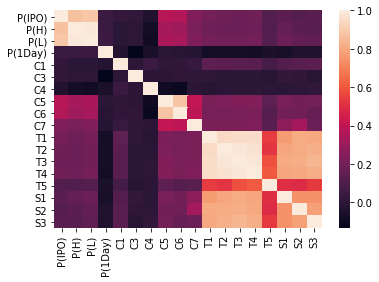

In [79]:
#heatmap
import seaborn as sns
correlation= data[cols_2].corr()
sns.heatmap(correlation)

# Normality Test 
- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

- Histogram
- Quantile-Quantile Plot
- Statistical Normality Tests
- Shapiro-Wilk Test

In [ ]:
#for gaussian---only use for continuous values
#most direct way to look for normality is using a histogram!!!!!

In [28]:
from sklearn import preprocessing
from scipy.stats import shapiro

In [29]:
from matplotlib import pyplot
pyplot.hist(test_data)
pyplot.show()

##not a normal bell shaped curve--need to normalize 

<Figure size 640x480 with 1 Axes>

In [30]:
#x_array = np.array(data['C1'])
#normalized_C1 = preprocessing.normalize([x_array])

stat, p = shapiro(test_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
###sample needs to be normalized---does not pass test

Statistics=0.103, p=0.000
Sample does not look Gaussian (reject H0)


/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Normalization--MEANS MAKE THINGS NORMAL

#how to normalize with z score or anything else for the mode

1. normality test-check if it necessary
2. normalize what we have to
3. standardize if necessary

In [39]:
test_data=['C1','C2','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']

In [40]:
########THIS IS STANDARDIZATION
##WHEN YOU USE ZSCORE, YOU ARE ASSUmING NORMALITY

#iterate over remaining columns and create new zscore column
#do we need to include Y1 and Y2??????

test_columns = list(test_data.columns)
for col in test_columns:
    col_zscore = col + '_zscore'
    test_data[col_zscore] = (test_data[col] - test_data[col].mean())/test_data[col].std(ddof=0)
    
test_data.head()

In [41]:
#do column by column---for continuous values

helpful_log = np.log(test_data)
helpful_log.describe()

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [34]:
#go column by column---for continuous
#notice if it is too stong in  a histogram
#kirtosis---original vs new--call function in a for loop




stat, p = shapiro(helpful_log)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
##sample has passed normalization test

NameError: name 'helpful_log' is not defined

# Standardization

In [75]:
pip install--megankuscsik <mlxtend>

/bin/sh: 1: Syntax error: end of file unexpected
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from mlxtend.preprocessing import minmax_scaling

In [99]:
test_data=['C1','C2','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']

In [105]:
#zscore standardization---mean= 0, stdev=1

standardize(test_data, columns=test_data.columns)

ModuleNotFoundError: No module named 'mlxtend'

In [101]:
#min-max standardization
#use sklearn import----use sklearn z score



#min_max_scaling = minmax_scaling(test_data, columns = test_data.columns)
#min_max_scaling

ModuleNotFoundError: No module named 'mlxtend'

# Discretization 

In [ ]:
#optional

# Conversion

In [ ]:
#optional

# Outliers 

# Data Reduction

# Extra

In [ ]:
# first count how many 0's
data = data.astype(str)
data['P(1Day)'] = data['P(1Day)'].str.strip()
data['P(1Day)'] = data['P(1Day)'].replace('-', 0)
data['P(1Day)'] = data['P(1Day)'].astype(float)

In [ ]:
data = data.astype(str)
data = data.replace('-',0)
data[['P(IPO)','P(H)','P(L)','P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']] = data[['P(IPO)','P(H)','P(L)','P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']].astype(float)

In [ ]:
data['C2'] = data['C2'].astype(int)

In [ ]:
data.info()

In [ ]:
# 
data['T2'].value_counts()

In [ ]:
# similarities between different null values 
sim = data[data['P(1Day)']==0]

In [ ]:
sim_missing_val = data[(data['P(1Day)']==0) & (data['P(IPO)']==0) & (data['P(H)']==0)].count()

In [ ]:
# number of zeros in each column 
(data == 0).astype(int).sum(axis=0)

In [ ]:
# Number of non-zero values 
data.astype(bool).sum(axis=0)

In [ ]:
data.head()

In [ ]:
# replace with nulls
# maybe we can run it with zeros/np.nan
cols = ["P(IPO)","P(H)","P(L)","P(1Day)","C1",'C2','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
data[cols] = data[cols].replace({0:np.nan})

# Imputate with median
# check if it works right 
data[cols]=data[cols].fillna(data[cols].median())
#.iloc[0]
data['C5'] = data['C5'].fillna(data['C5'].median())

# display
data.head(12)

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['P(IPO)'])
plt.show()

In [ ]:
pd.plotting.scatter_matrix(data[["P(IPO)","P(H)","P(L)"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [ ]:
no_object = data.select_dtypes(exclude=['object'])

In [ ]:
no_object.values

In [ ]:
# normalize with min/max
x = no_object.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
# normalization with sklearn 
from sklearn import preprocessing
# Normalize P(IPO) column (1 column)
x_array = np.array(data['P(IPO)'])
normalized_X = preprocessing.normalize([x_array])

In [ ]:
normalized_X

In [ ]:
# mean normalization
normalized_df=(df-df.mean())/df.std()

# min/max normalization 
normalized_df=(df-df.min())/(df.max()-df.min())

# Note that `select_dtypes` returns a data frame. We are selecting only the columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(zscore)

# Standardization/normalization 

In [ ]:
# STANDARDIZATION
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [ ]:
# Correlation Analysis 

In [ ]:
# WHEN YOU HAVE ALL THE CALCULATIONS AND VARIATIONS DOWN DECIDE ON THE ORDER OF THE PROCESSING AND WHAT TO TRY AFTER
# THEN RUN THE MODEL